In [1]:
!git clone https://github.com/lllyasviel/ControlNet.git

Cloning into 'ControlNet'...
remote: Enumerating objects: 1264, done.
remote: Counting objects: 100% (1264/1264), done.
remote: Compressing objects: 100% (700/700), done.
remote: Total 1264 (delta 563), reused 925 (delta 546), pack-reused 0
Receiving objects: 100% (1264/1264), 122.34 MiB | 32.51 MiB/s, done.
Resolving deltas: 100% (563/563), done.


In [5]:
! git clone https://github.com/takuma104/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 20917, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 20917 (delta 117), reused 110 (delta 56), pack-reused 20716
Receiving objects: 100% (20917/20917), 14.54 MiB | 28.57 MiB/s, done.
Resolving deltas: 100% (15052/15052), done.


In [72]:
# from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
%cd diffusers/src
# diffusers/src/diffusers/models/controlnet.py
# diffusers/src/diffusers/schedulers/scheduling_unipc_multistep.py
from diffusers.models.controlnet import ControlNetModel
from diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_controlnet import StableDiffusionControlNetPipeline
from diffusers.schedulers.scheduling_unipc_multistep import UniPCMultistepScheduler
import torch
%cd ..
%cd ..

/home/jovyan/diffusers/src
/home/jovyan/diffusers
/home/jovyan


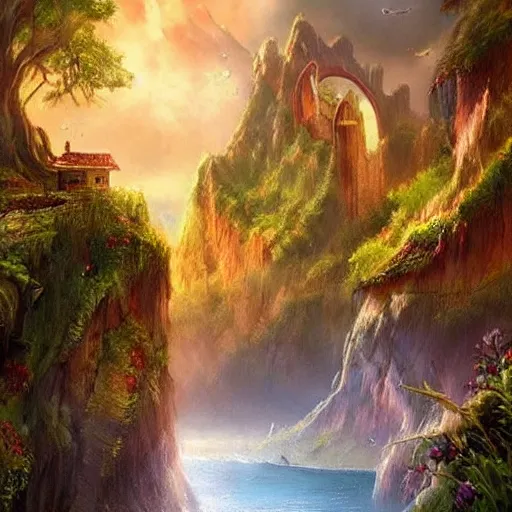

In [74]:
canny_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/landscape.png"
)
canny_image

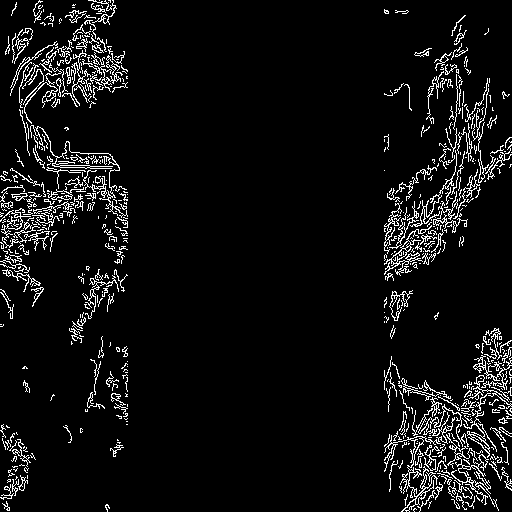

In [75]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np
from diffusers.utils import load_image

canny_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/landscape.png"
)
canny_image = np.array(canny_image)

low_threshold = 100
high_threshold = 200

canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)

# zero out middle columns of image where pose will be overlayed
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)
canny_image

cuda


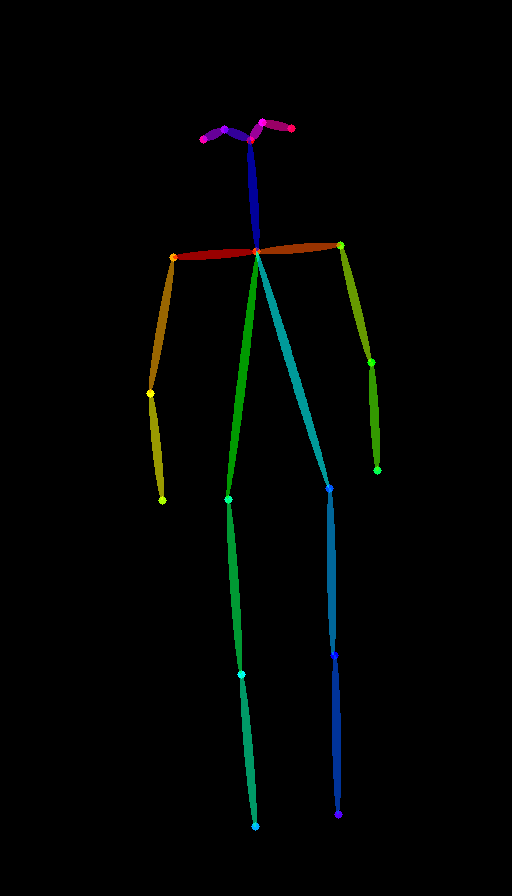

In [76]:
# %cd ..
# %cd ..
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

openpose_image = cv2.imread("sahab.jpeg")
# openpose_image

openpose_image = openpose(openpose_image)
openpose_image

In [77]:


controlnet = [
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16),
]

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)


In [78]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

pipe.enable_xformers_memory_efficient_attention()
pipe.enable_model_cpu_offload()

prompt = "young man with same background best quality"   #a giant standing in a fantasy landscape, best quality
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality"

generator = torch.Generator(device="cpu").manual_seed(1)

images = [openpose_image, canny_image]

image = pipe(
    prompt,
    images,
    num_inference_steps=20,
    generator=generator,
    negative_prompt=negative_prompt,
    controlnet_conditioning_scale=[1.0, 0.8],
).images[0]

image.save("./multi_controlnet_output.png")

100%|██████████| 20/20 [00:04<00:00,  4.80it/s]


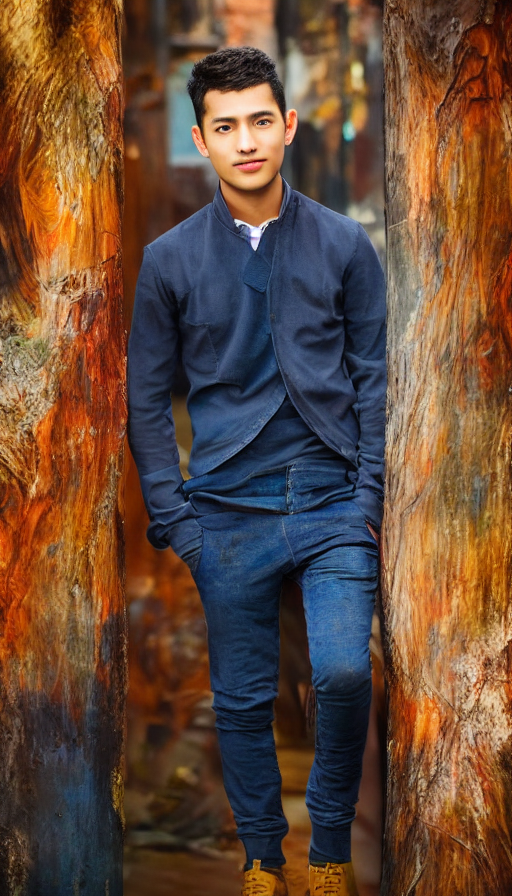

In [79]:
image

cuda


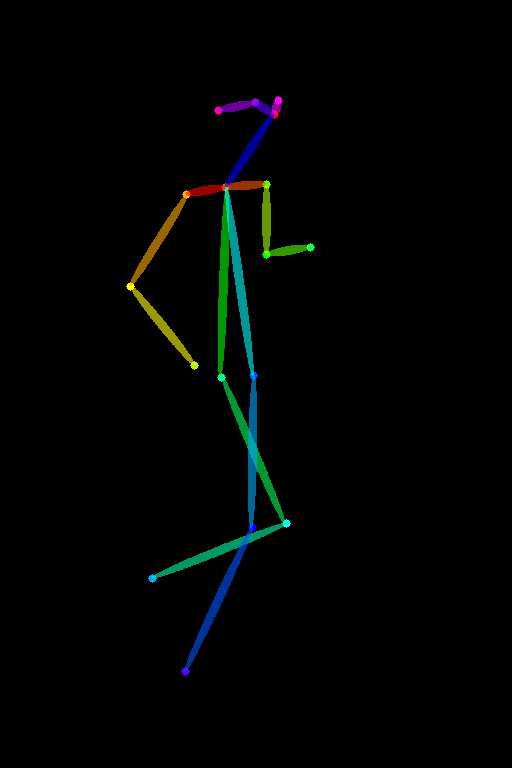

In [80]:
# %cd ..
# %cd ..
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

openpose_image2 = cv2.imread("runningimage.jpeg")
# openpose_image

openpose_image2 = openpose(openpose_image2)
openpose_image2

In [81]:
images = [openpose_image2, canny_image]

image = pipe(
    prompt,
    images,
    num_inference_steps=20,
    generator=generator,
    negative_prompt=negative_prompt,
    controlnet_conditioning_scale=[1.0, 0.8],
).images[0]

image.save("./multi_controlnet_output.png")

100%|██████████| 20/20 [00:03<00:00,  5.61it/s]


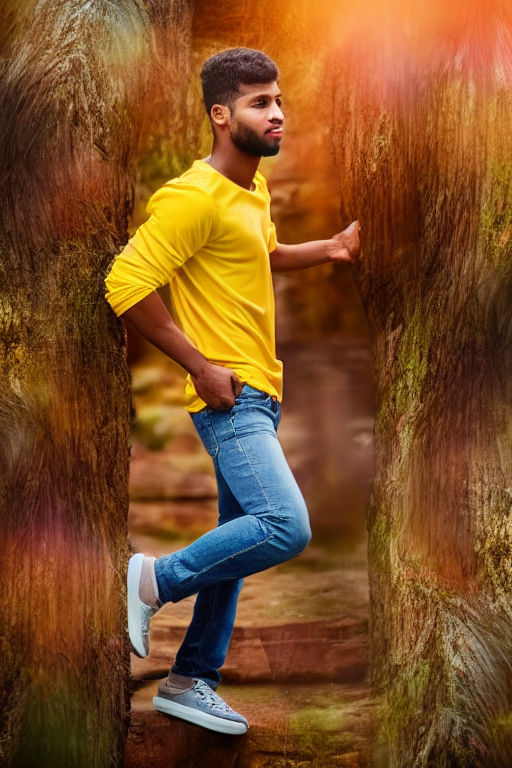

In [82]:
image

In [60]:
%cd jovyan

/home/jovyan


In [67]:
!pwd

/home/jovyan/diffusers/src
